In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Data Populasi 2013-2021.csv')
df.head()

Kelurahan   2013   2014   2015   2016   2017   2018   2019   2020   2021
0         ANCOL  33462  19700  21791  20450  20936  17606  21375  21366  21625
1         ANGKE  39672  25557  25549  25537  25594  23509  26155  25850  25541
2  BALE KAMBANG  21374  21185  21933  23202  23302  23263  25233  25774  26111
3   BALI MESTER   8383   8091   7919   8180   8262   8353   8384   8279   8228
4    BAMBU APUS  19003  18911  19605  20944  21126  20919  22809  23330  23745

In [5]:
col = df["Kelurahan"]
th = pd.Series("tahun")
new_col = th.append(col)
new_col

0                tahun
0                ANCOL
1                ANGKE
2         BALE KAMBANG
3          BALI MESTER
            ...       
263    UTAN KAYU UTARA
264       UTAN PANJANG
265            WARAKAS
266      WIJAYA KUSUMA
267              Total
Length: 269, dtype: object

In [6]:
df_new = df.drop("Kelurahan", axis = 1)
df_transposed = df_new.transpose()
df_transposed = df_transposed.reset_index()
df_transposed

index      0      1      2     3      4      5      6      7      8  ...  \
0  2013  33462  39672  21374  8383  19003  17314  18594  36124  18762  ...   
1  2014  19700  25557  21185  8091  18911  17287  18511  36066  18287  ...   
2  2015  21791  25549  21933  7919  19605  17667  18676  36423  18171  ...   
3  2016  20450  25537  23202  8180  20944  18361  19304  38454  19508  ...   
4  2017  20936  25594  23302  8262  21126  18543  19516  38771  19636  ...   
5  2018  17606  23509  23263  8353  20919  18914  20396  36305  18389  ...   
6  2019  21375  26155  25233  8384  22809  19126  21033  41431  19303  ...   
7  2020  21366  25850  25774  8279  23330  19139  21312  41998  19158  ...   
8  2021  21625  25541  26111  8228  23745  19272  21532  42656  19083  ...   

     258    259    260    261    262    263    264    265    266      267  
0  51113  93510  22083  31529  27340  23651  24582  62434  51313  8852899  
1  29371  55188  22342  31354  26854  23022  24036  36434  32174  7059300  
2  32652  54240  23140  31395  27315  23113  25010  35814  31819  7118110  
3  31977  57185  24080  33580  28110  24117  25567  38151  33546  7451676  
4  32390  57606  24253  33606  28129  24141  26339  38316  33389  7512756  
5  31977  53016  20981  30942  28661  22218  24841  34971  32220  7172730  
6  34561  59751  26142  35405  29110  24825  26524  39881  34588  7848312  
7  35172  59995  26569  35800  29224  24832  26746  39741  34289  7893326  
8  35780  60671  26930  36263  29310  24743  26557  40079  34257  7954412  

[9 rows x 269 columns]

In [7]:
df_transposed.columns = new_col
df_transposed

tahun  ANCOL  ANGKE  BALE KAMBANG  BALI MESTER  BAMBU APUS  BANGKA   BARU  \
0  2013  33462  39672         21374         8383       19003   17314  18594   
1  2014  19700  25557         21185         8091       18911   17287  18511   
2  2015  21791  25549         21933         7919       19605   17667  18676   
3  2016  20450  25537         23202         8180       20944   18361  19304   
4  2017  20936  25594         23302         8262       21126   18543  19516   
5  2018  17606  23509         23263         8353       20919   18914  20396   
6  2019  21375  26155         25233         8384       22809   19126  21033   
7  2020  21366  25850         25774         8279       23330   19139  21312   
8  2021  21625  25541         26111         8228       23745   19272  21532   

   BATU AMPAR  BENDUNGAN HILIR  ...  TUGU SELATAN  TUGU UTARA  UJUNG MENTENG  \
0       36124            18762  ...         51113       93510          22083   
1       36066            18287  ...         29371       55188          22342   
2       36423            18171  ...         32652       54240          23140   
3       38454            19508  ...         31977       57185          24080   
4       38771            19636  ...         32390       57606          24253   
5       36305            18389  ...         31977       53016          20981   
6       41431            19303  ...         34561       59751          26142   
7       41998            19158  ...         35172       59995          26569   
8       42656            19083  ...         35780       60671          26930   

   ULUJAMI  UTAN KAYU SELATAN  UTAN KAYU UTARA  UTAN PANJANG  WARAKAS  \
0    31529              27340            23651         24582    62434   
1    31354              26854            23022         24036    36434   
2    31395              27315            23113         25010    35814   
3    33580              28110            24117         25567    38151   
4    33606              28129            24141         26339    38316   
5    30942              28661            22218         24841    34971   
6    35405              29110            24825         26524    39881   
7    35800              29224            24832         26746    39741   
8    36263              29310            24743         26557    40079   

   WIJAYA KUSUMA    Total  
0          51313  8852899  
1          32174  7059300  
2          31819  7118110  
3          33546  7451676  
4          33389  7512756  
5          32220  7172730  
6          34588  7848312  
7          34289  7893326  
8          34257  7954412  

[9 rows x 269 columns]

In [8]:
for item in col:
  df_transposed[f'Prediksi {item}'] = df_transposed[item].rolling(window=3).mean().fillna(0)

df_transposed.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


tahun  ANCOL  ANGKE  BALE KAMBANG  BALI MESTER  BAMBU APUS  BANGKA   BARU  \
0  2013  33462  39672         21374         8383       19003   17314  18594   
1  2014  19700  25557         21185         8091       18911   17287  18511   
2  2015  21791  25549         21933         7919       19605   17667  18676   
3  2016  20450  25537         23202         8180       20944   18361  19304   
4  2017  20936  25594         23302         8262       21126   18543  19516   

   BATU AMPAR  BENDUNGAN HILIR  ...  Prediksi TUGU SELATAN  \
0       36124            18762  ...               0.000000   
1       36066            18287  ...               0.000000   
2       36423            18171  ...           37712.000000   
3       38454            19508  ...           31333.333333   
4       38771            19636  ...           32339.666667   

   Prediksi TUGU UTARA  Prediksi UJUNG MENTENG  Prediksi ULUJAMI  \
0             0.000000                0.000000          0.000000   
1             0.000000                0.000000          0.000000   
2         67646.000000            22521.666667      31426.000000   
3         55537.666667            23187.333333      32109.666667   
4         56343.666667            23824.333333      32860.333333   

   Prediksi UTAN KAYU SELATAN  Prediksi UTAN KAYU UTARA  \
0                    0.000000                  0.000000   
1                    0.000000                  0.000000   
2                27169.666667              23262.000000   
3                27426.333333              23417.333333   
4                27851.333333              23790.333333   

   Prediksi UTAN PANJANG  Prediksi WARAKAS  Prediksi WIJAYA KUSUMA  \
0               0.000000          0.000000                0.000000   
1               0.000000          0.000000                0.000000   
2           24542.666667      44894.000000            38435.333333   
3           24871.000000      36799.666667            32513.000000   
4           25638.666667      37427.000000            32918.000000   

   Prediksi Total  
0    0.000000e+00  
1    0.000000e+00  
2    7.676770e+06  
3    7.209695e+06  
4    7.360847e+06  

[5 rows x 537 columns]

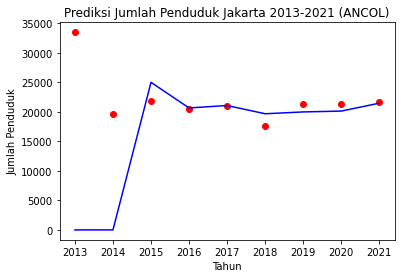

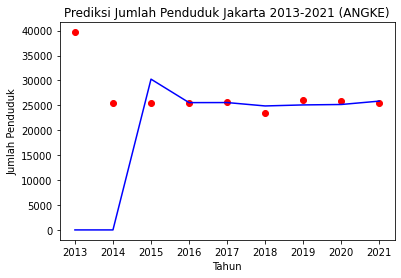

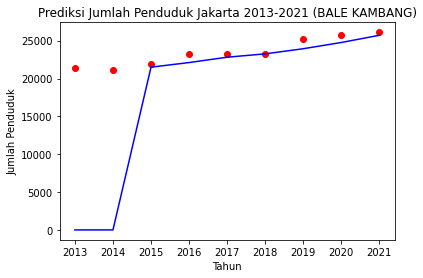

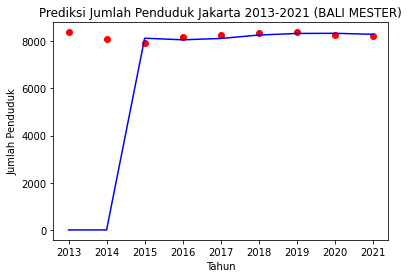

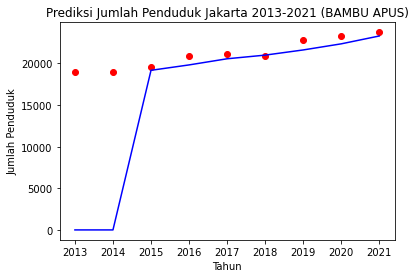

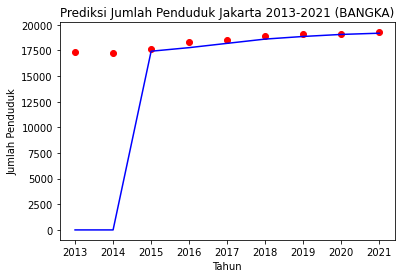

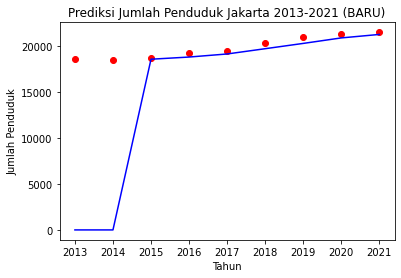

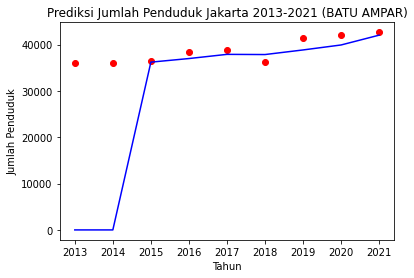

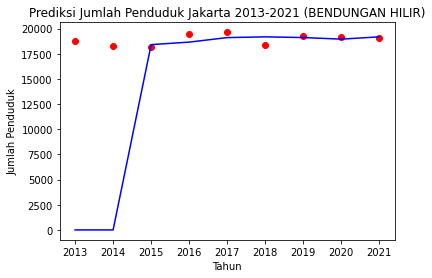

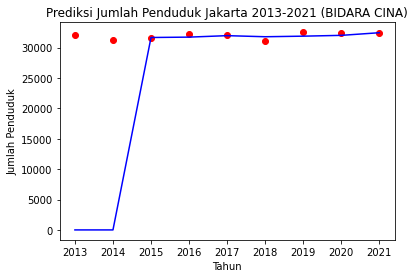

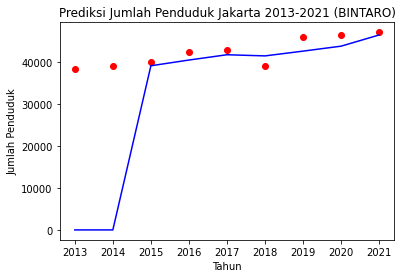

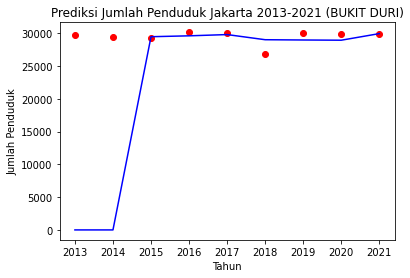

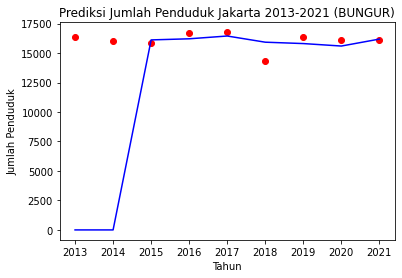

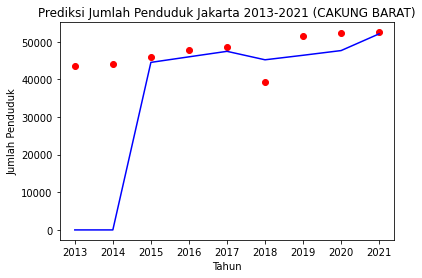

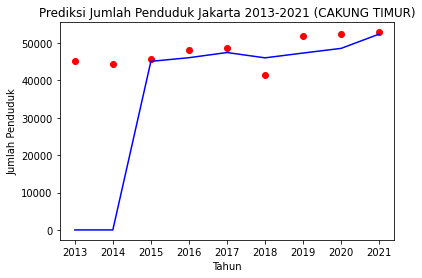

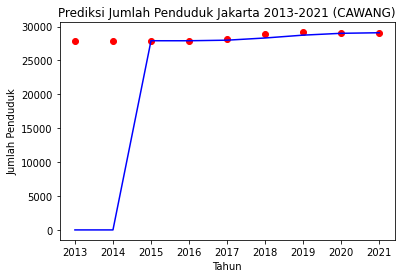

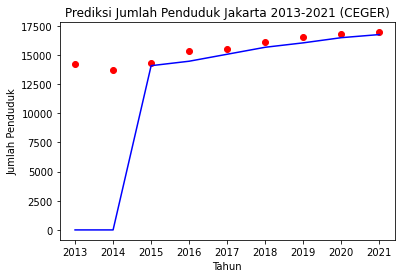

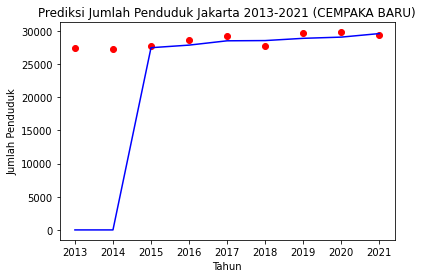

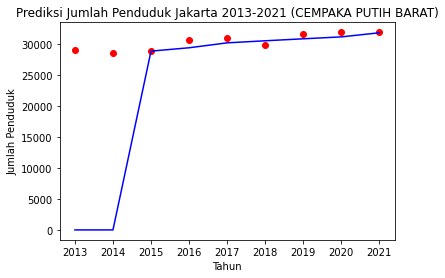

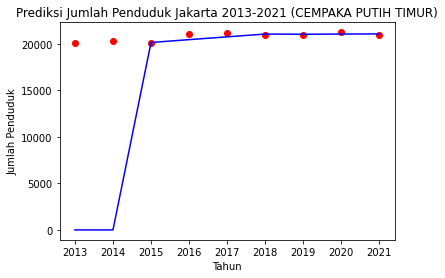

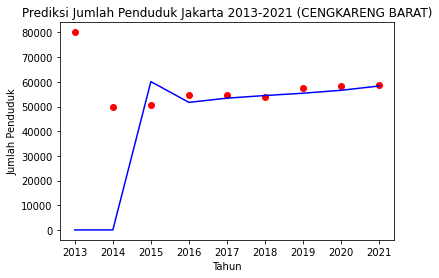

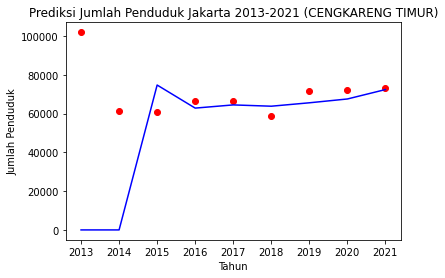

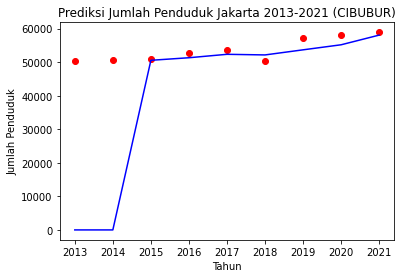

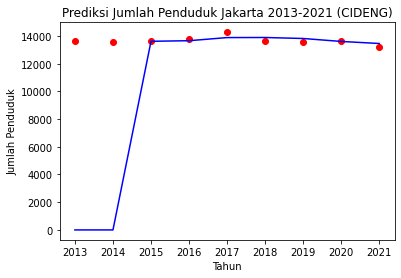

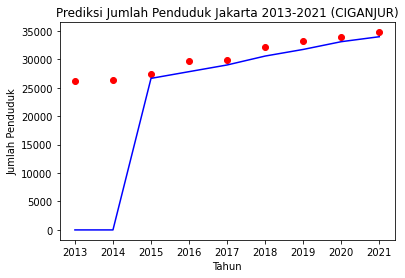

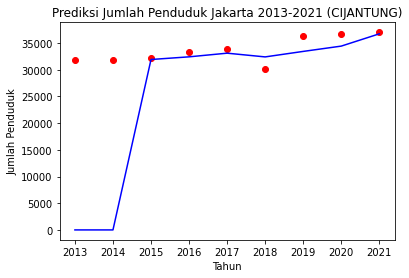

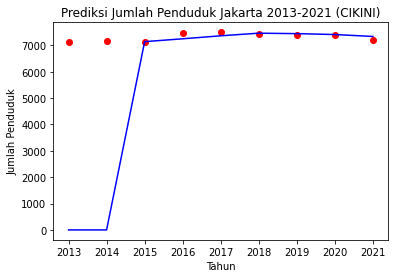

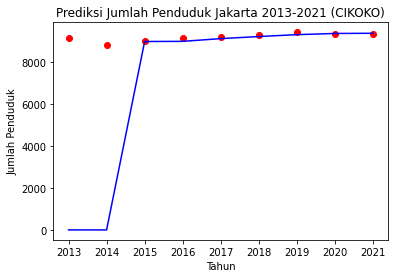

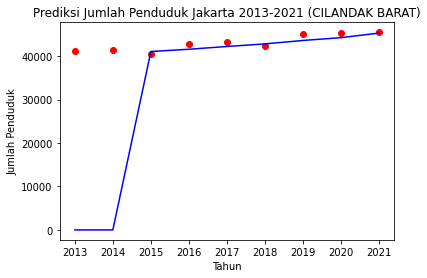

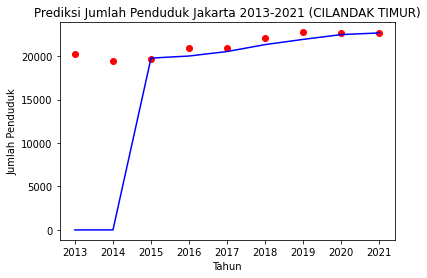

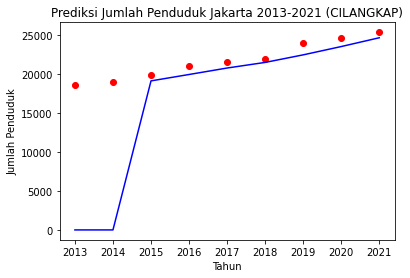

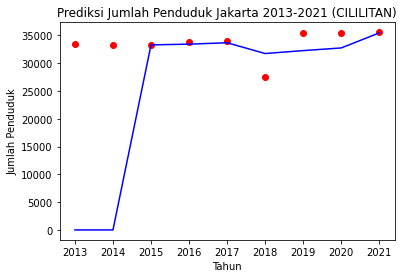

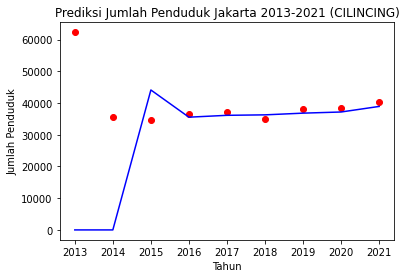

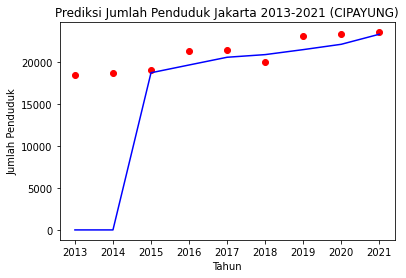

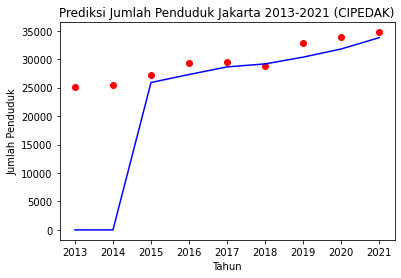

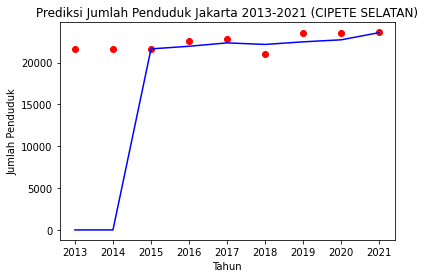

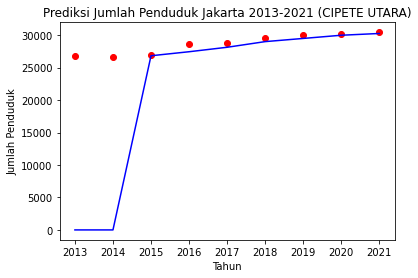

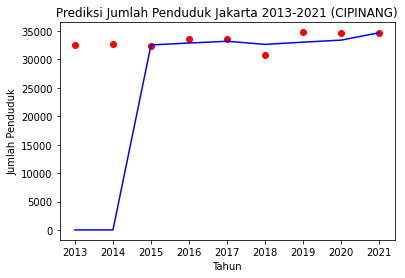

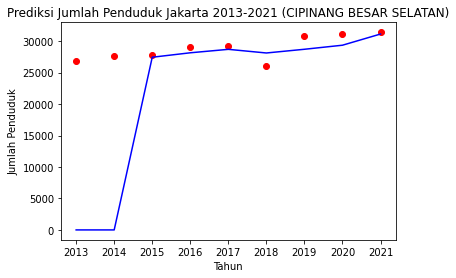

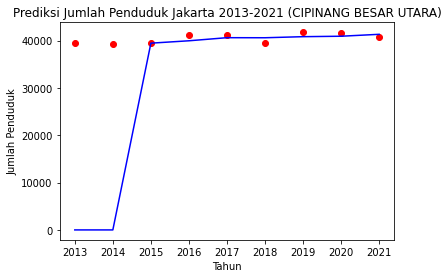

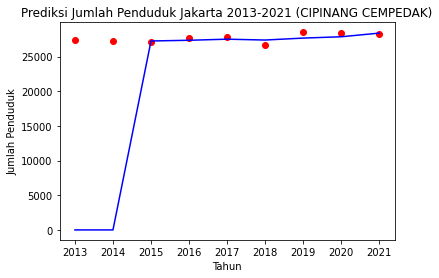

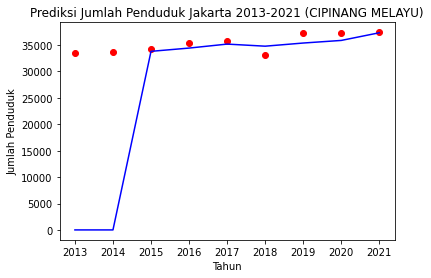

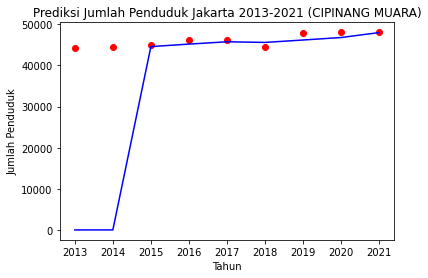

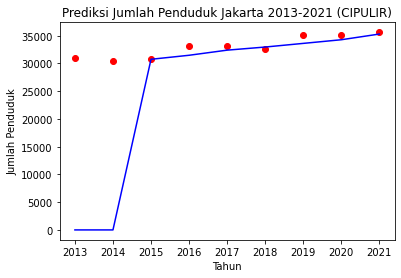

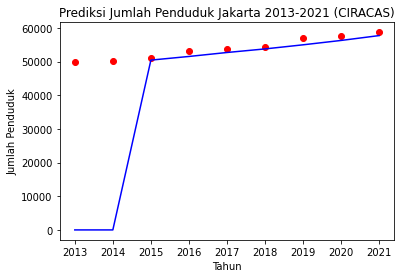

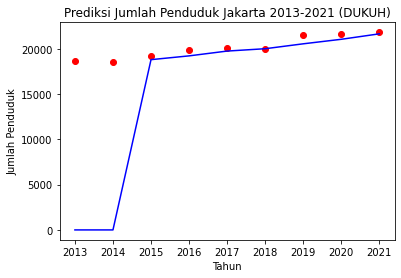

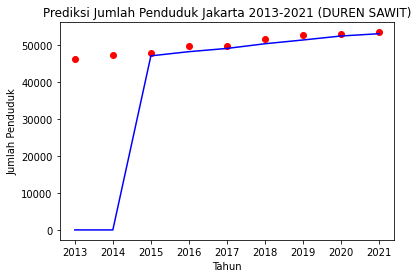

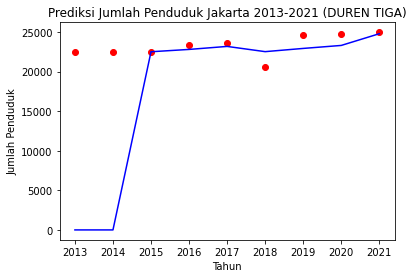

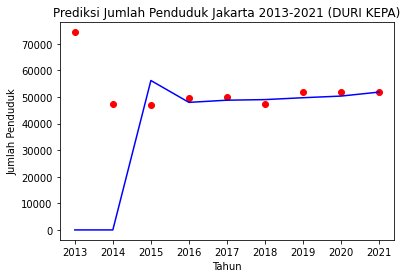

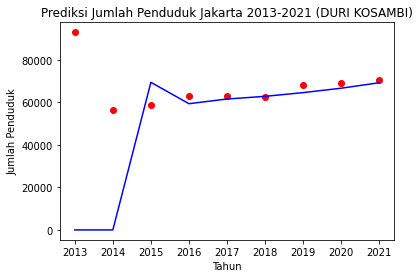

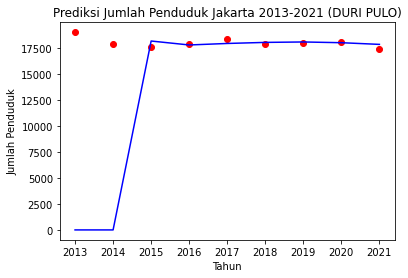

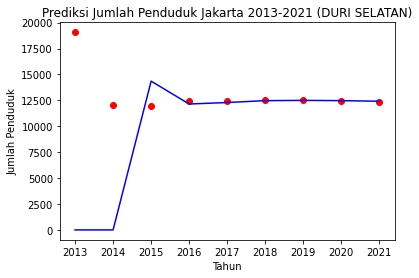

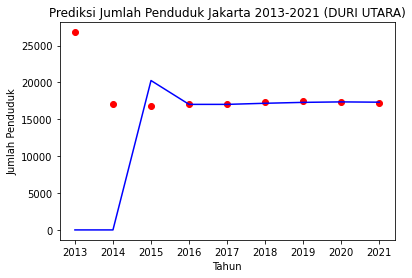

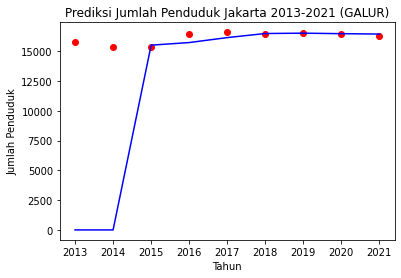

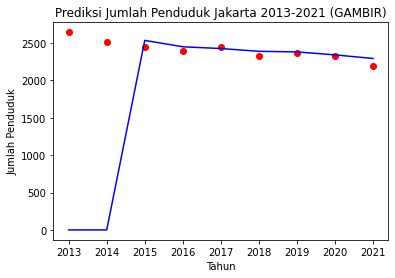

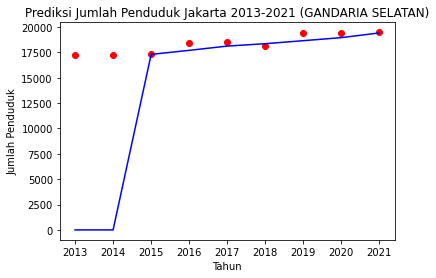

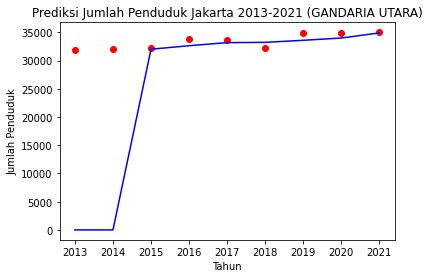

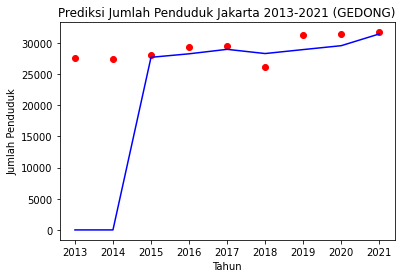

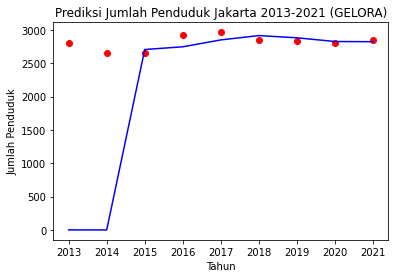

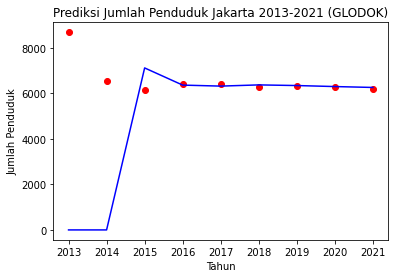

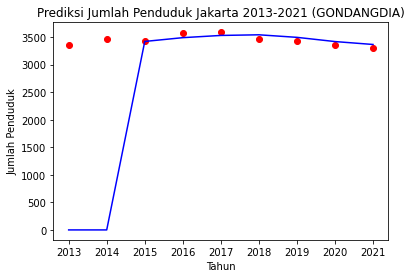

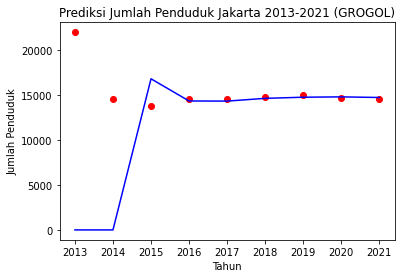

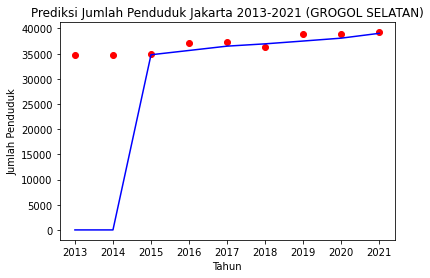

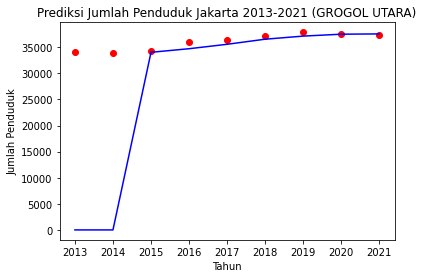

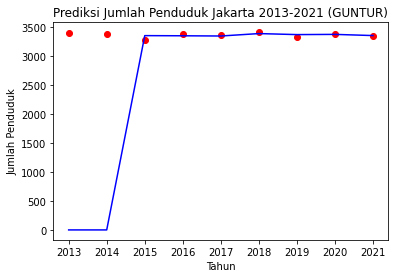

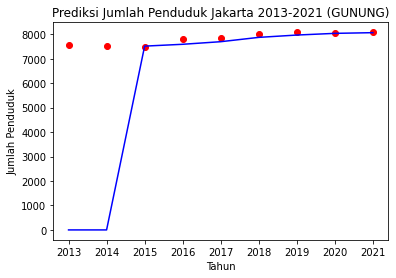

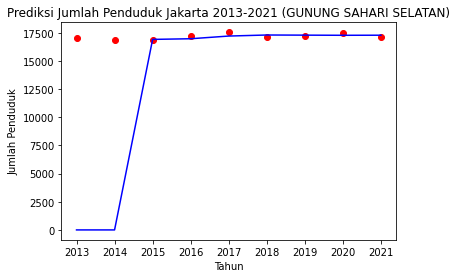

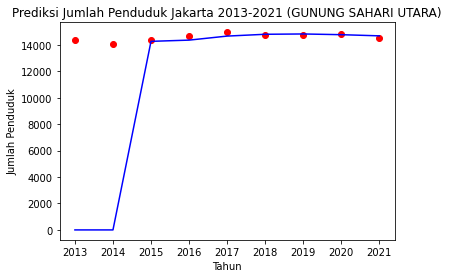

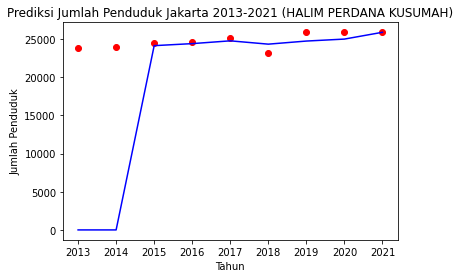

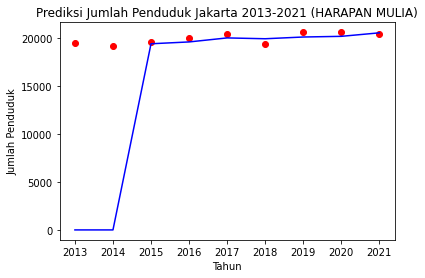

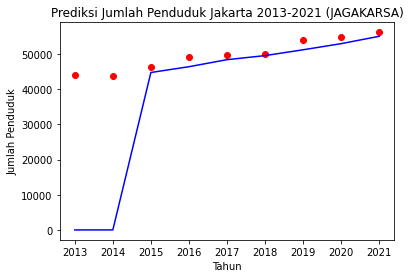

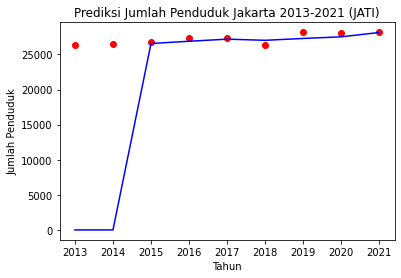

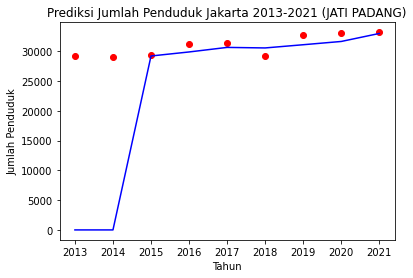

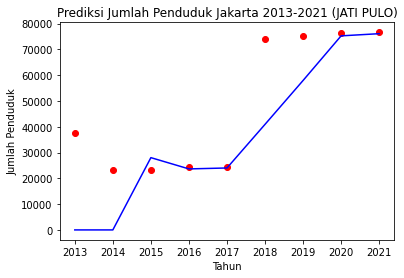

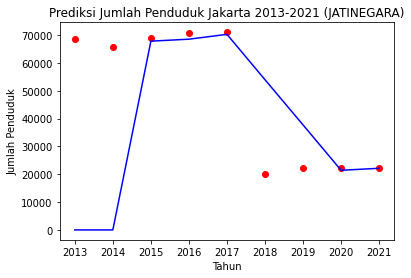

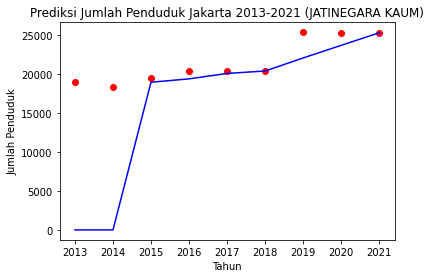

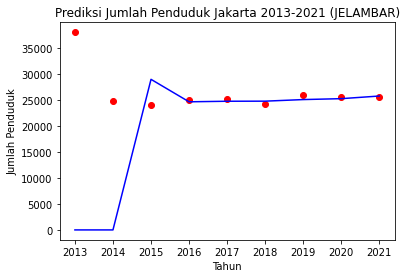

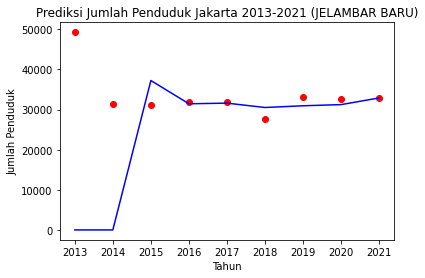

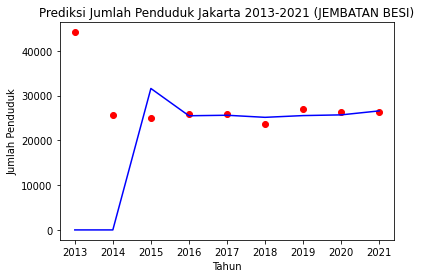

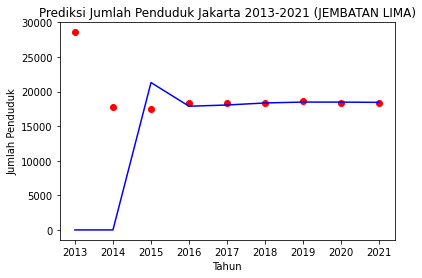

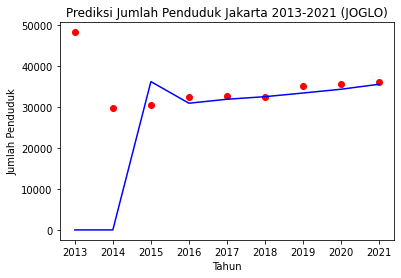

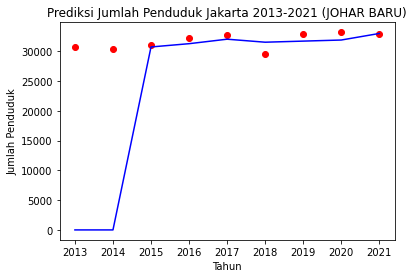

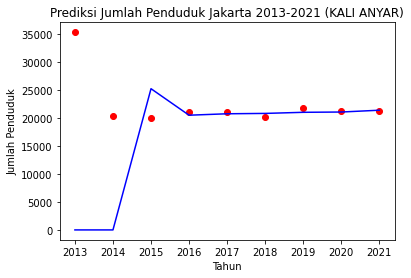

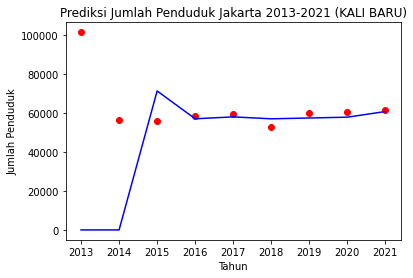

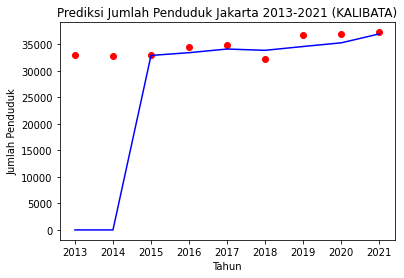

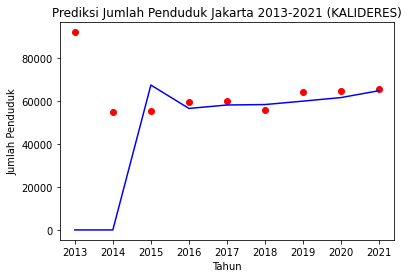

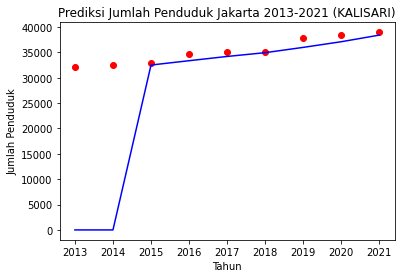

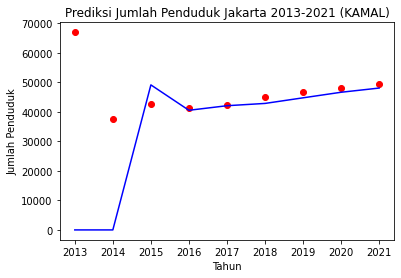

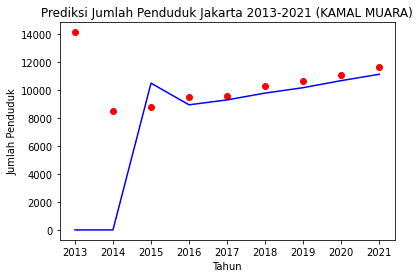

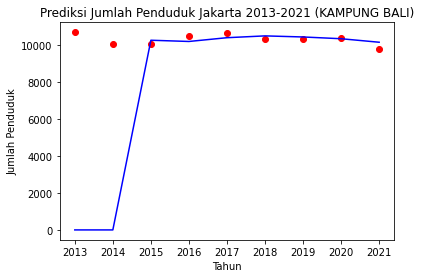

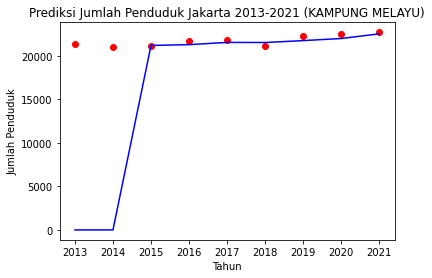

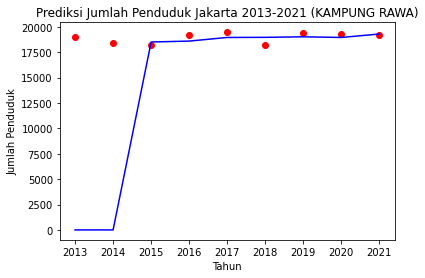

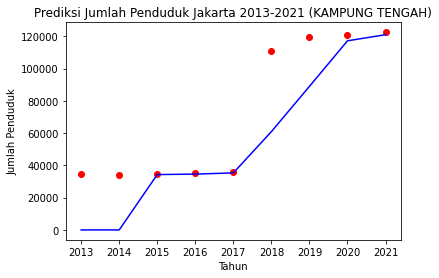

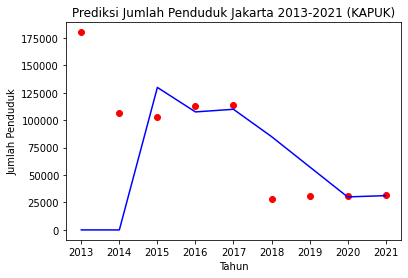

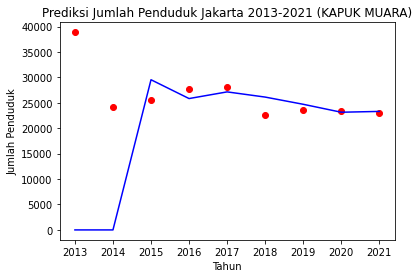

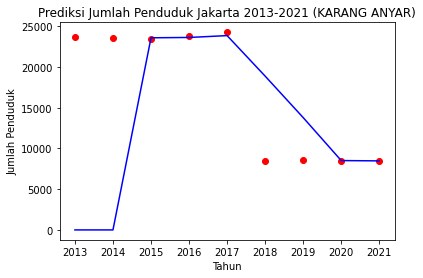

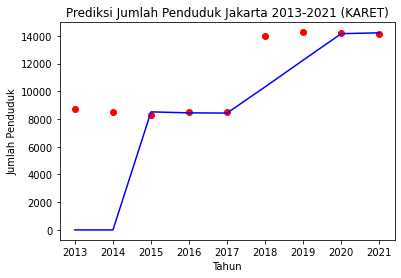

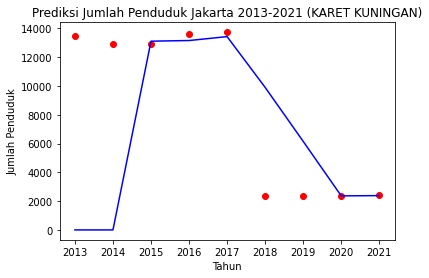

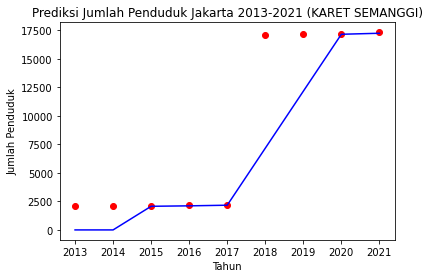

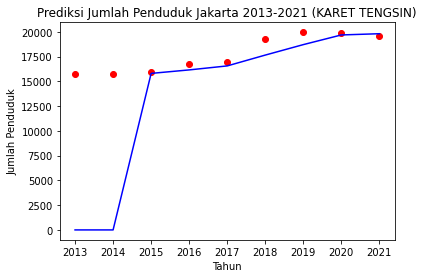

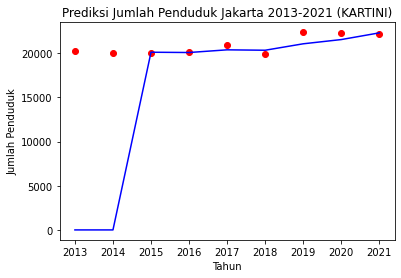

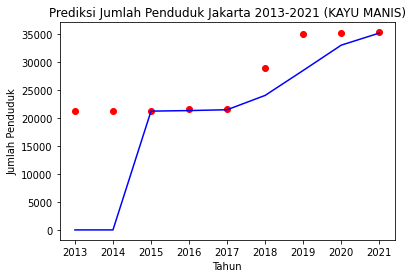

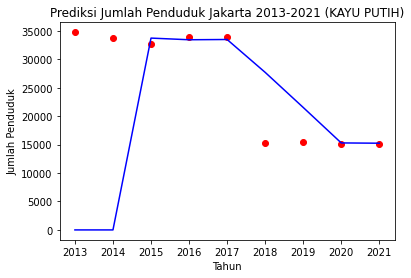

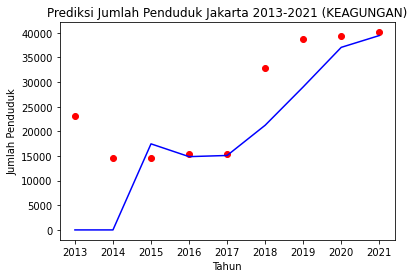

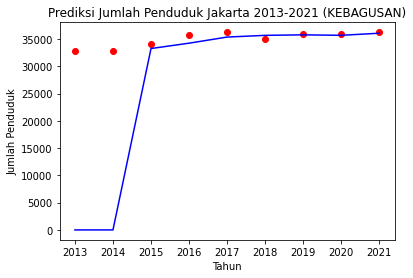

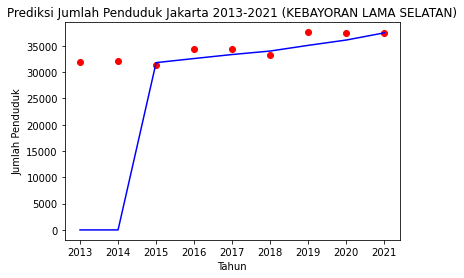

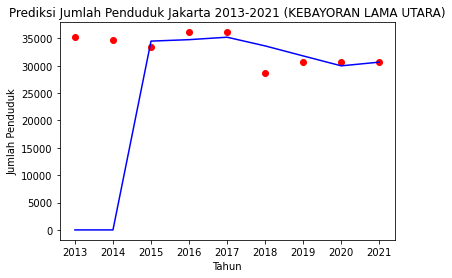

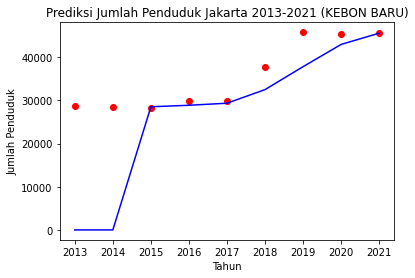

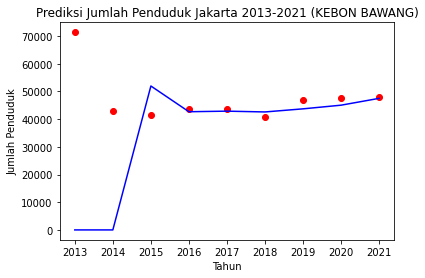

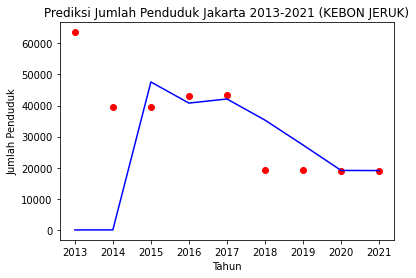

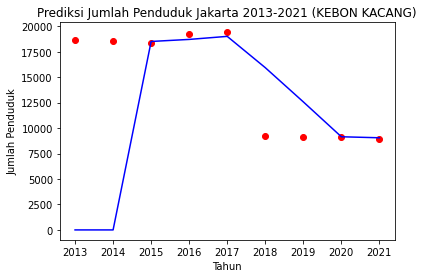

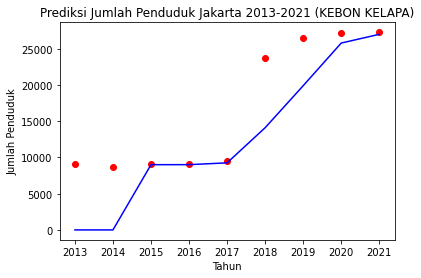

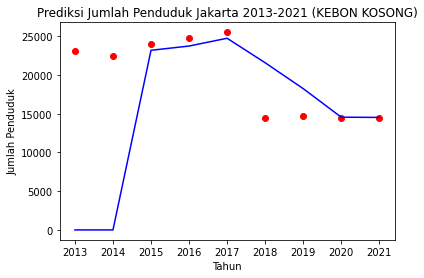

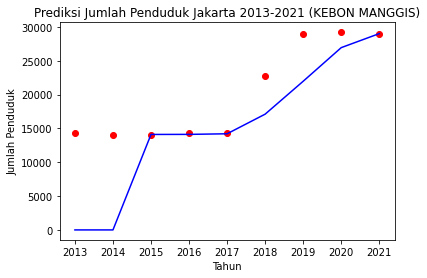

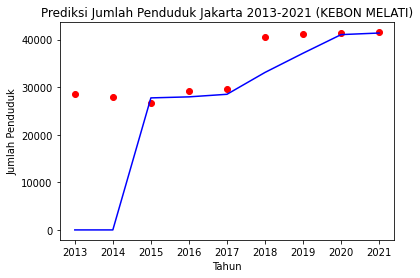

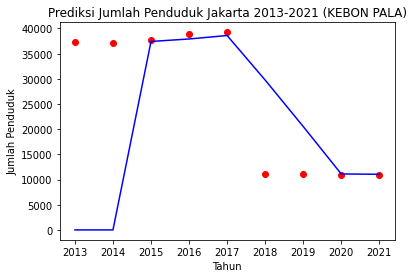

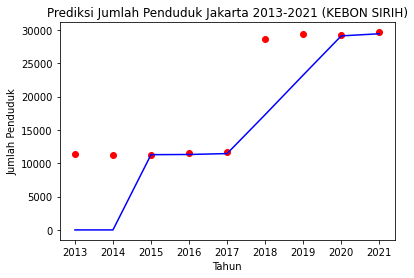

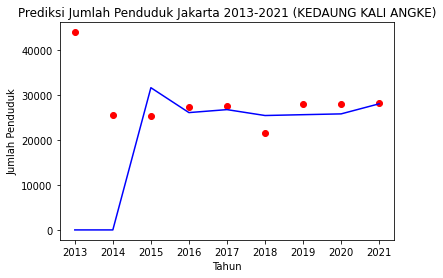

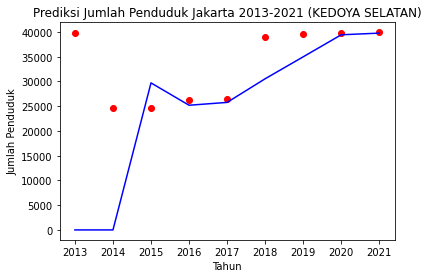

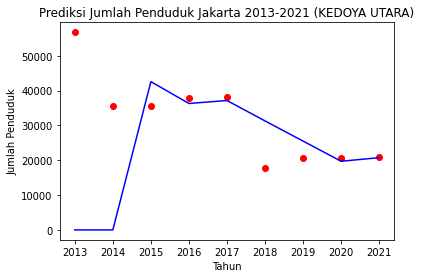

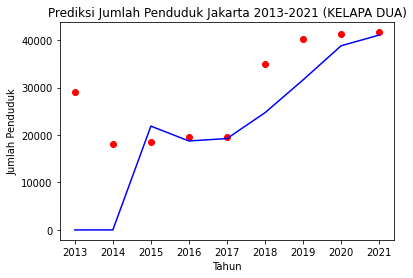

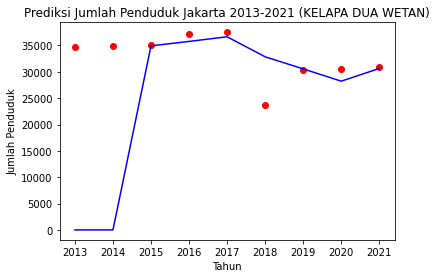

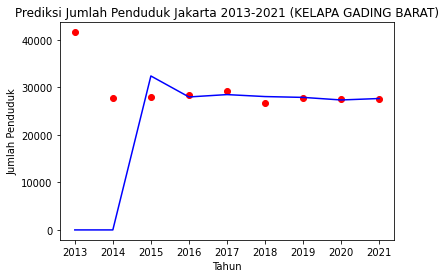

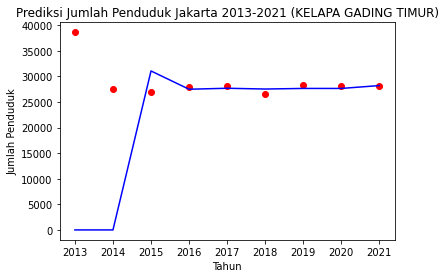

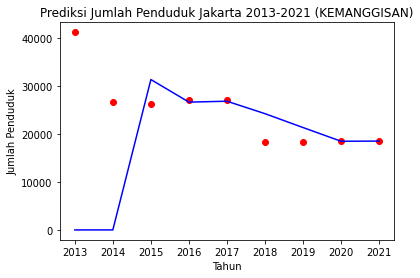

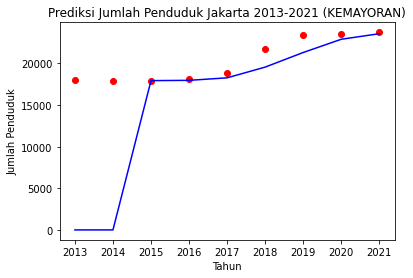

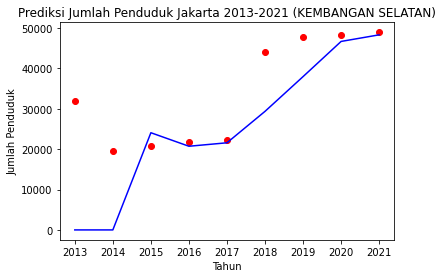

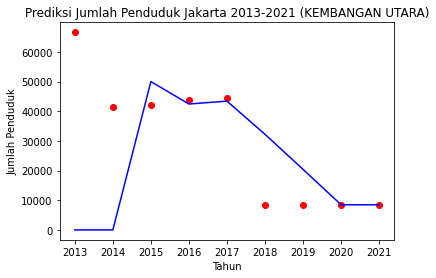

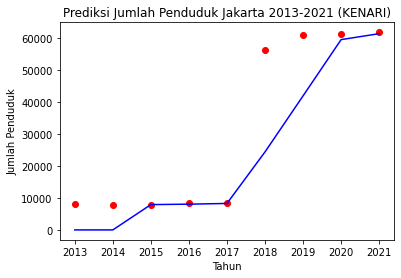

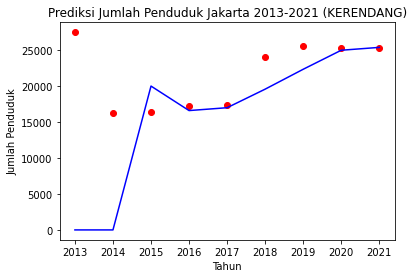

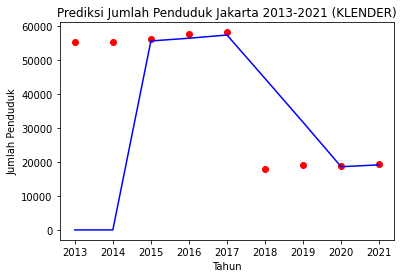

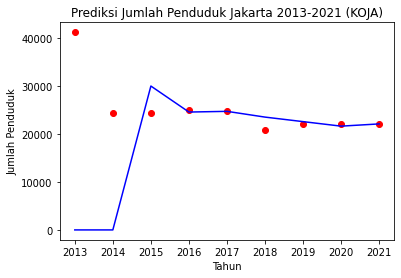

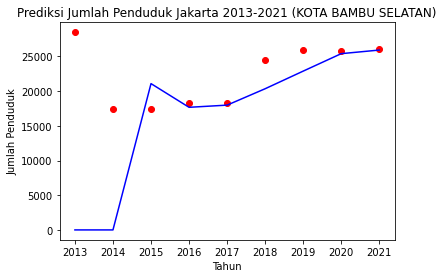

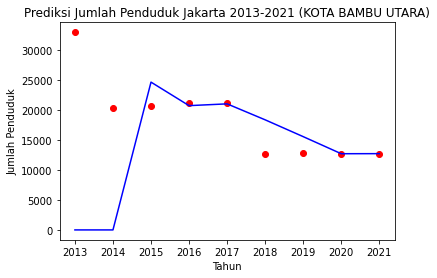

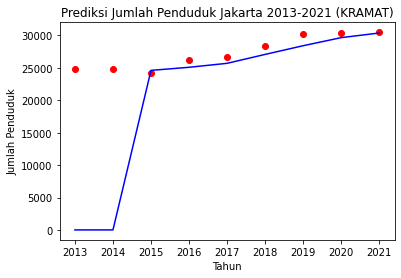

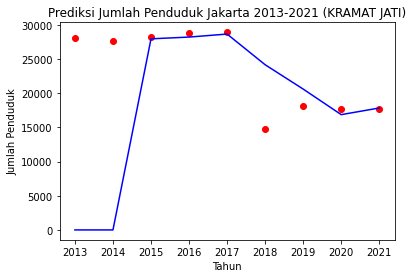

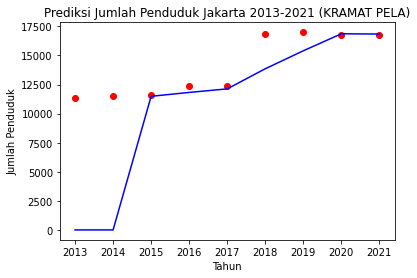

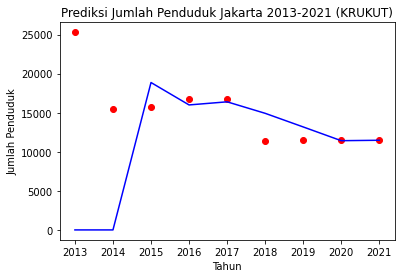

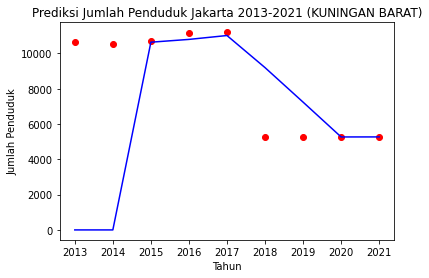

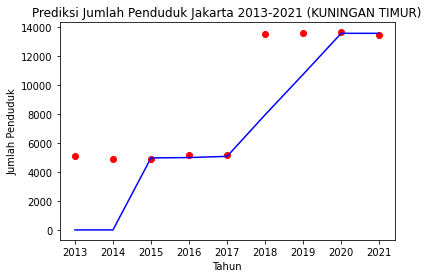

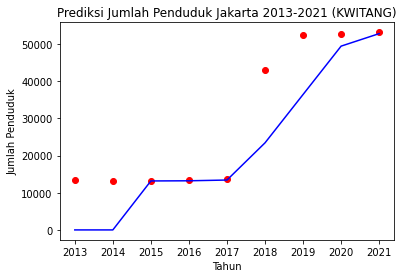

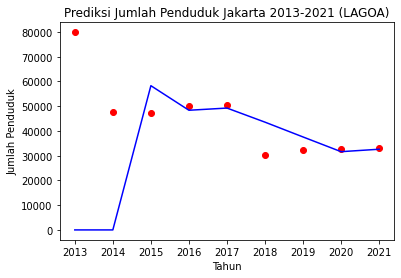

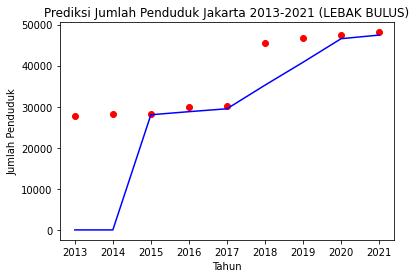

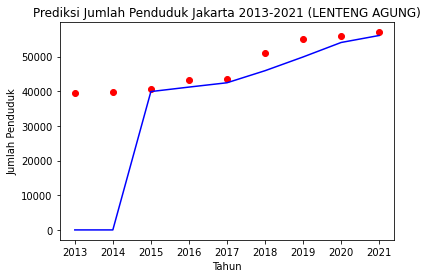

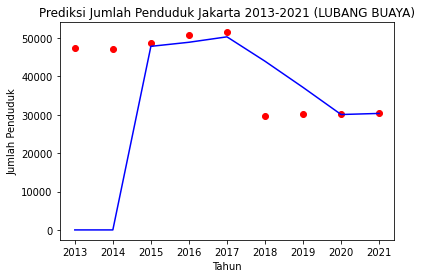

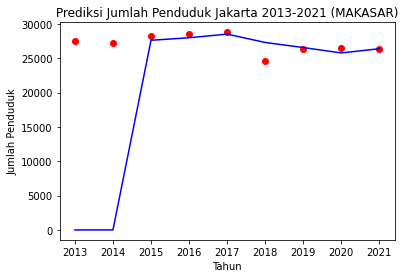

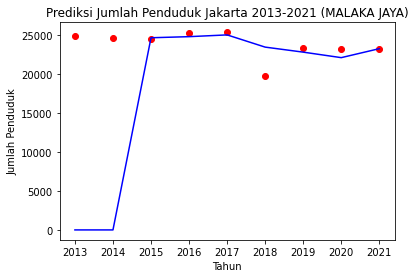

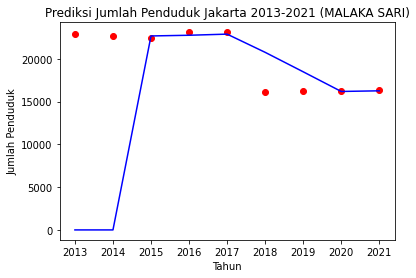

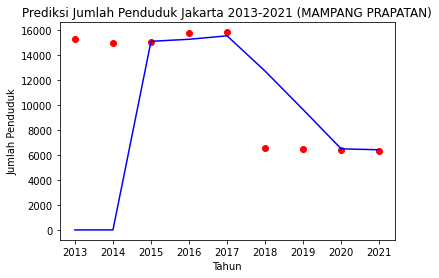

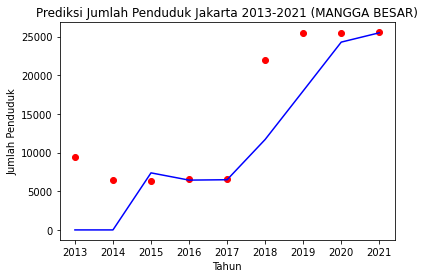

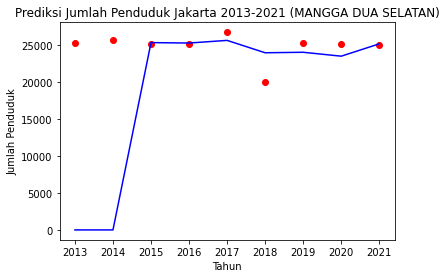

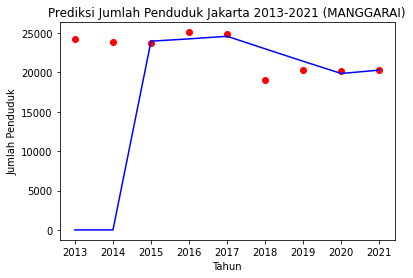

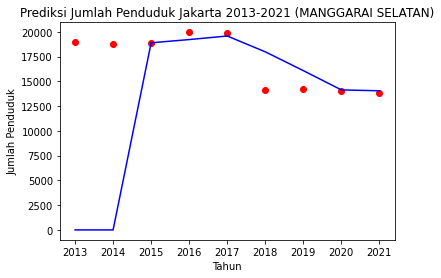

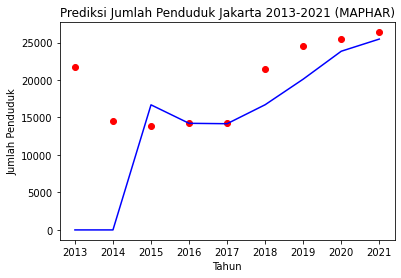

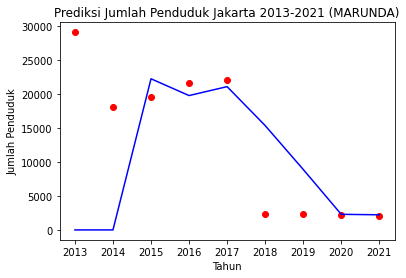

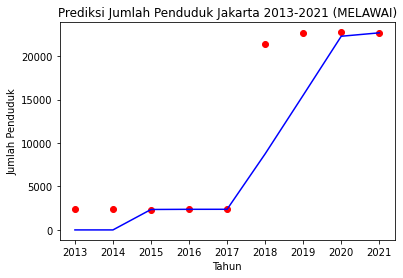

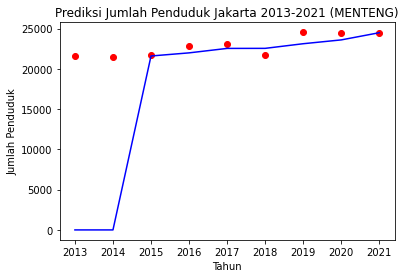

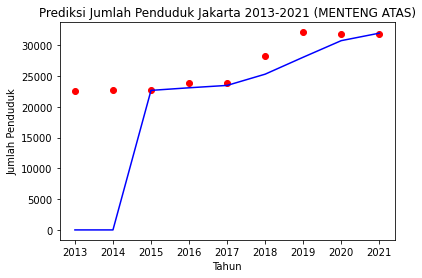

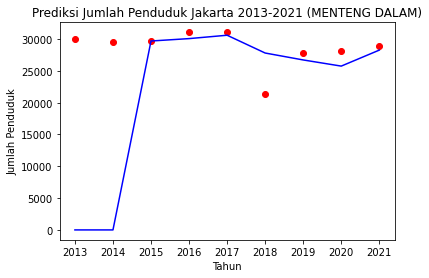

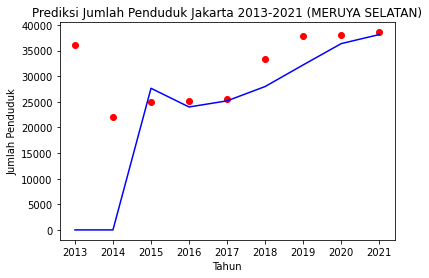

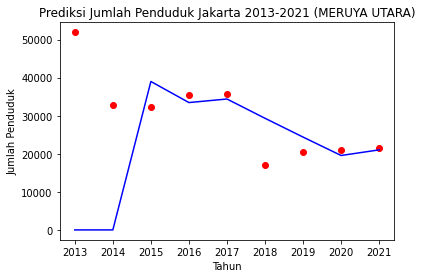

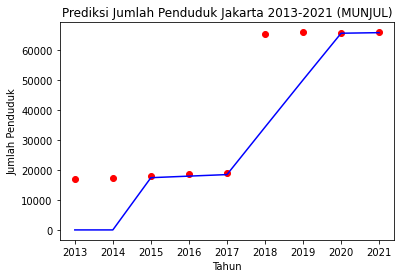

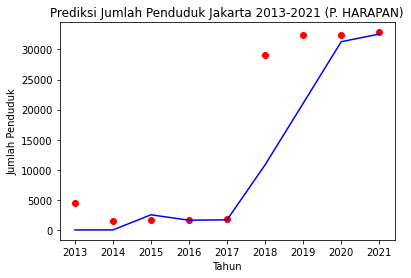

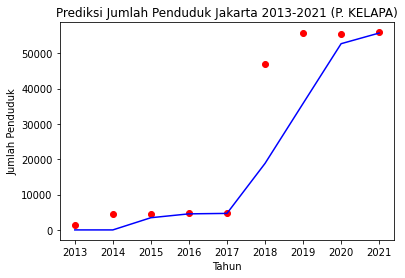

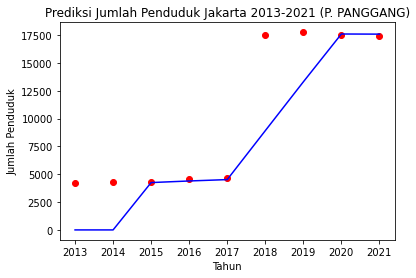

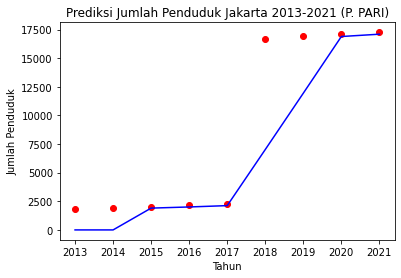

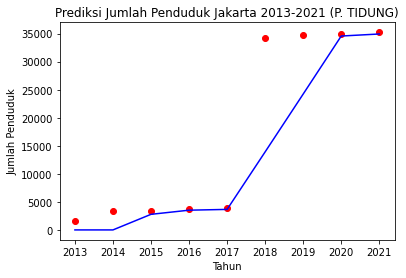

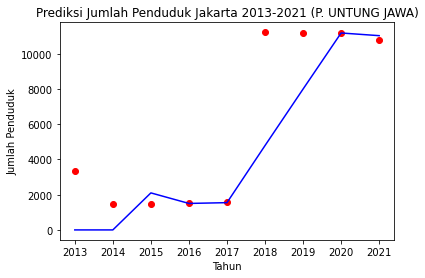

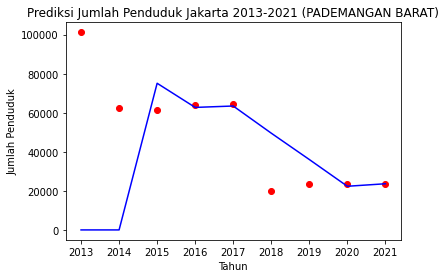

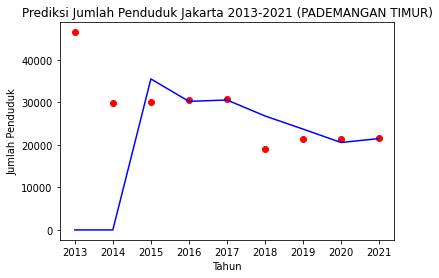

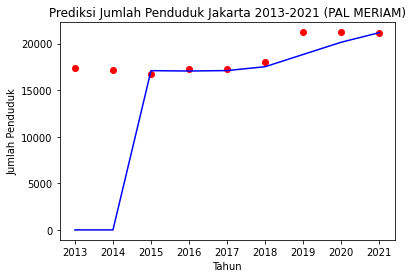

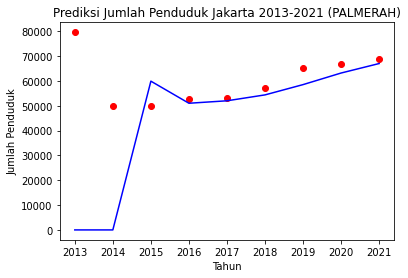

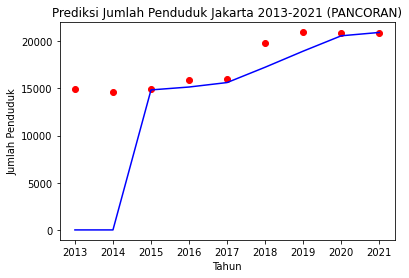

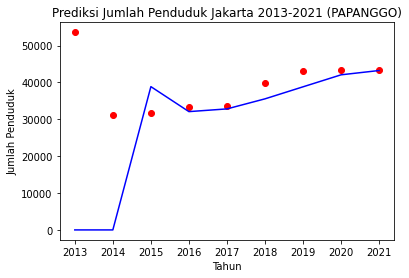

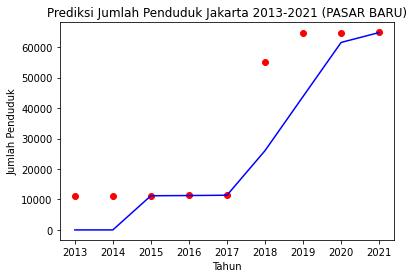

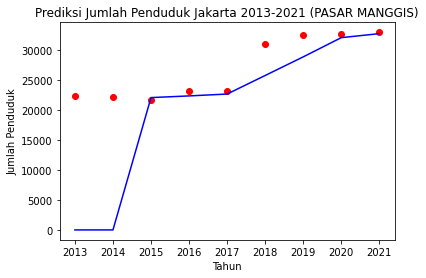

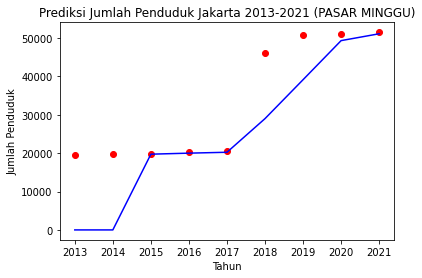

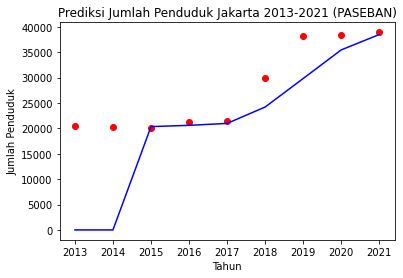

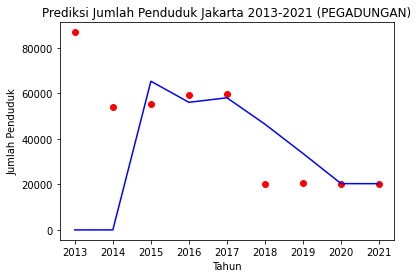

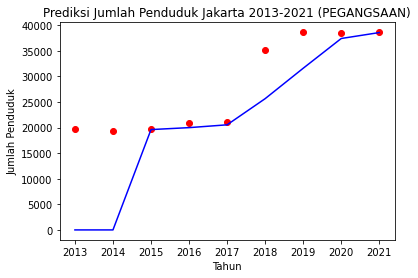

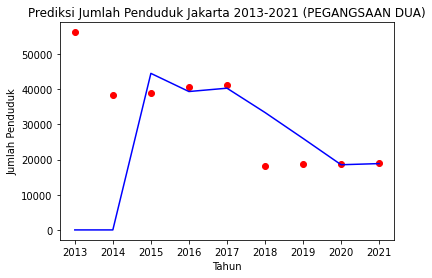

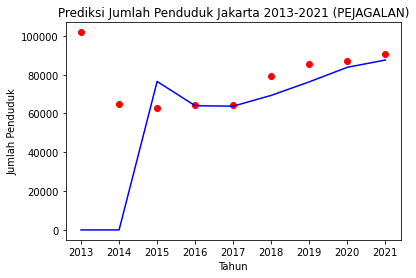

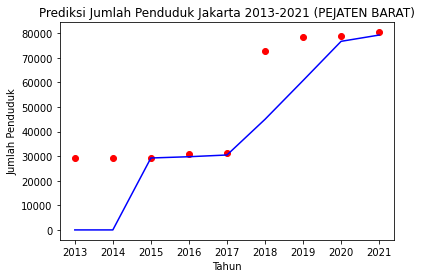

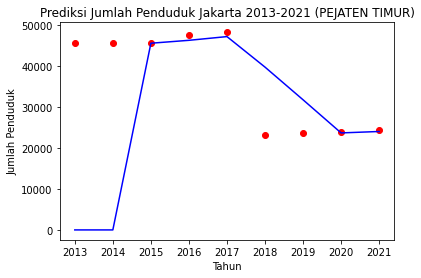

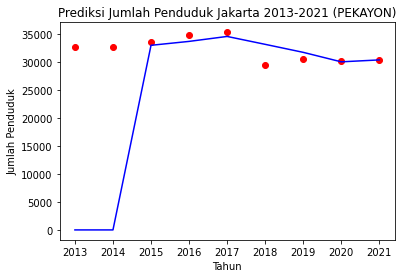

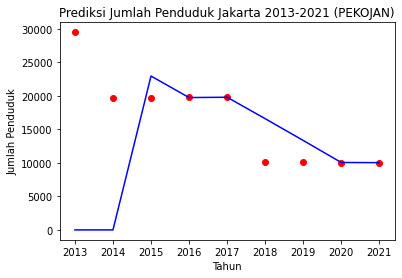

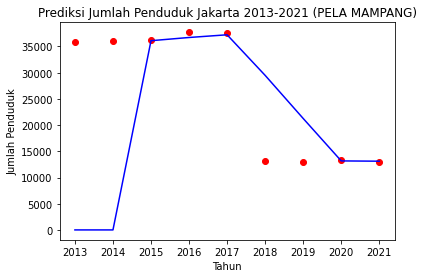

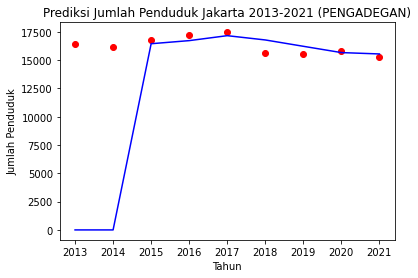

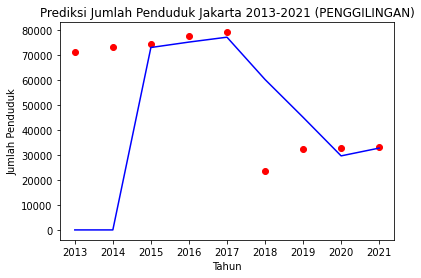

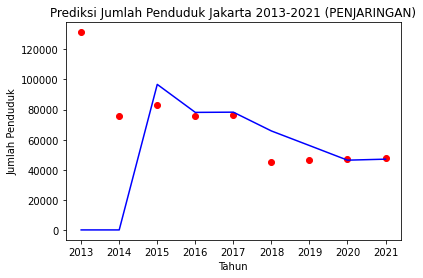

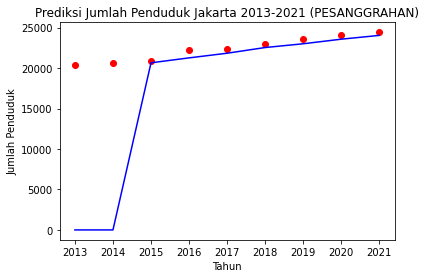

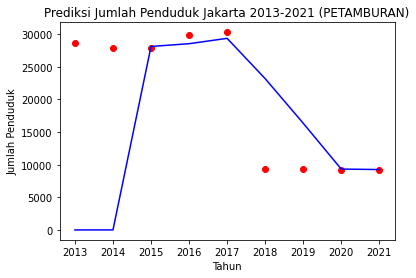

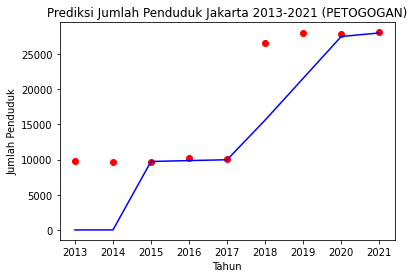

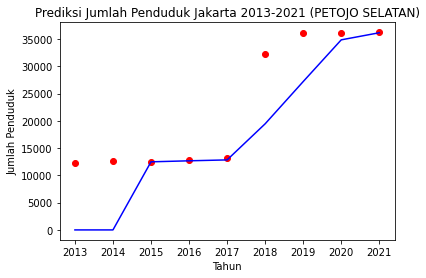

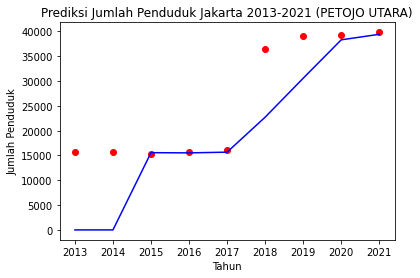

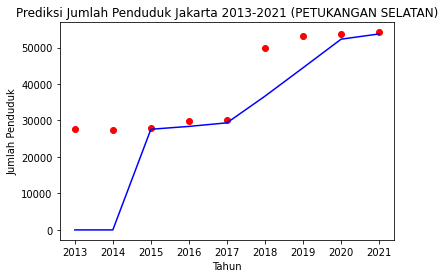

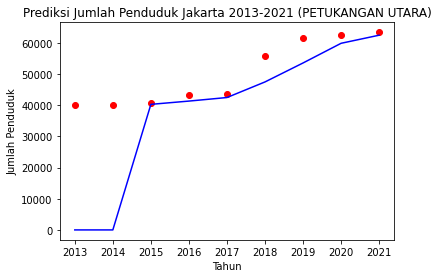

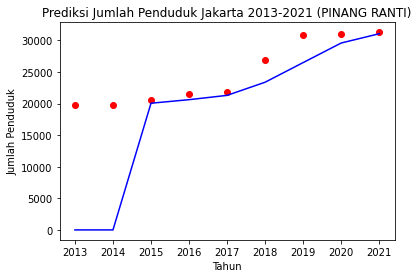

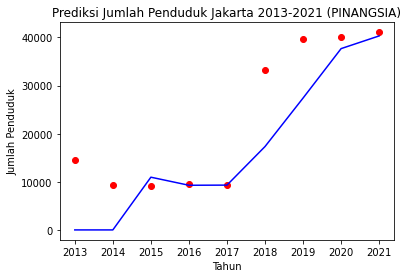

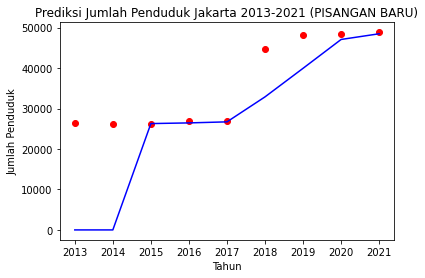

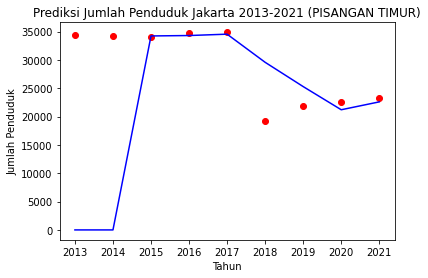

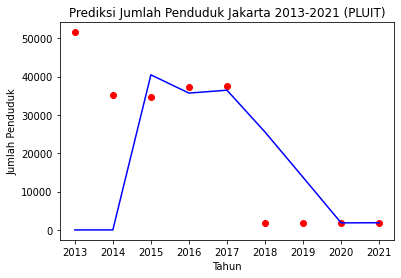

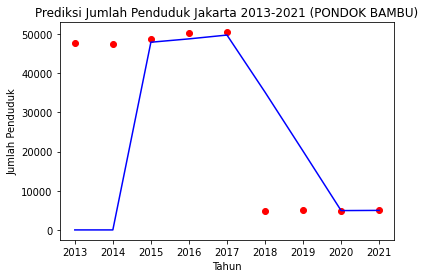

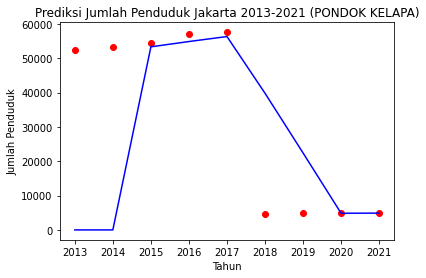

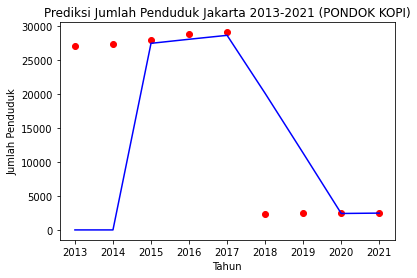

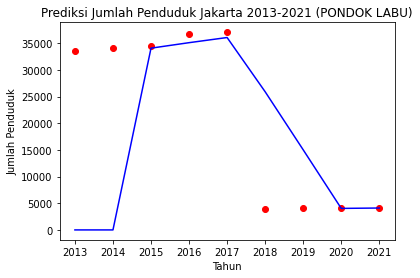

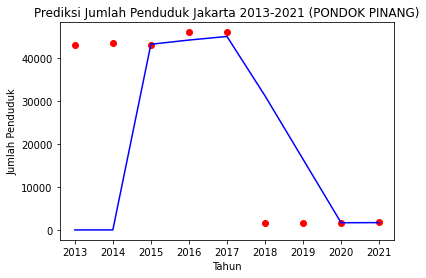

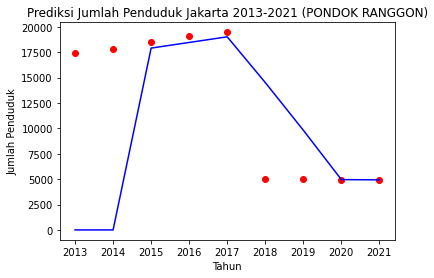

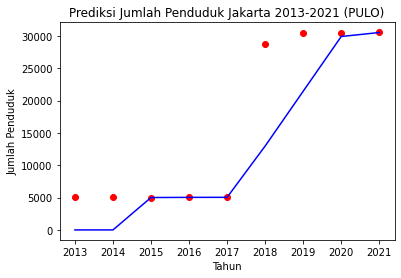

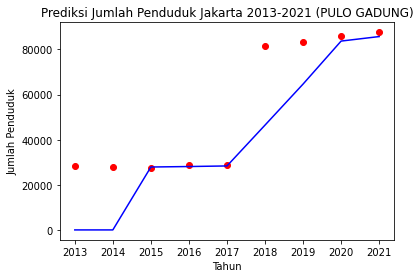

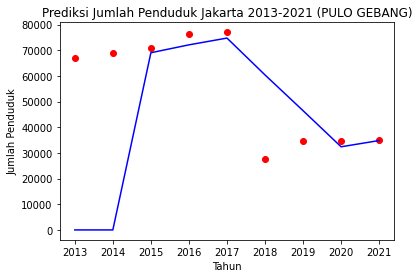

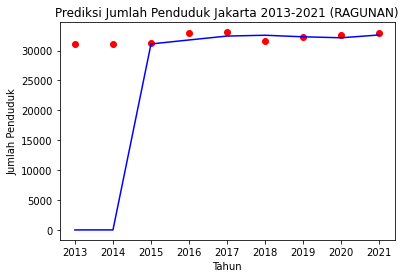

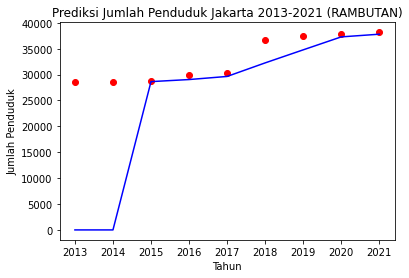

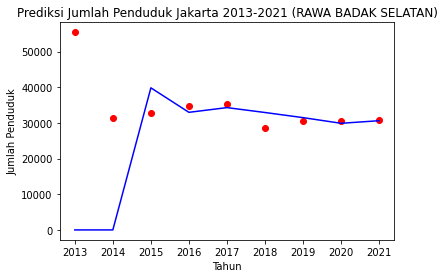

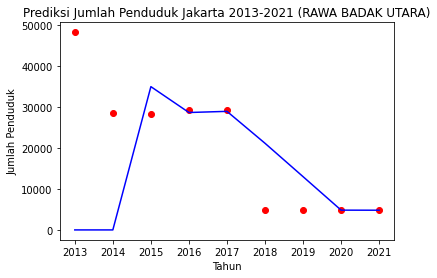

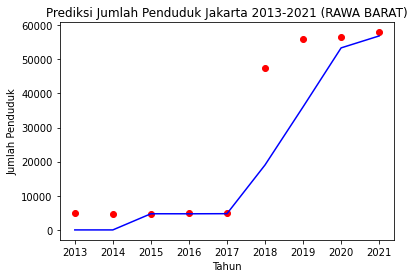

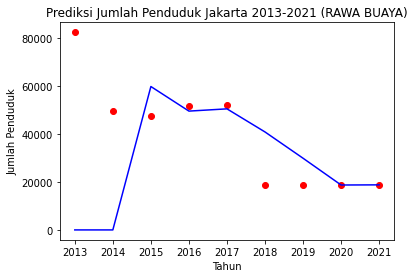

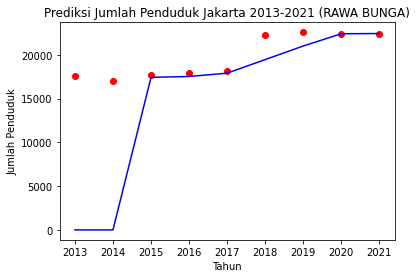

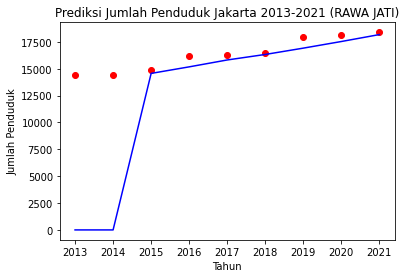

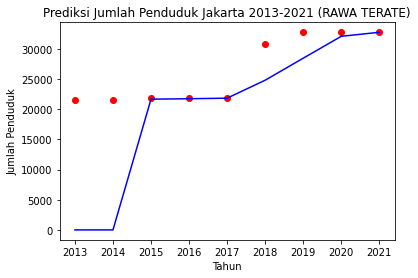

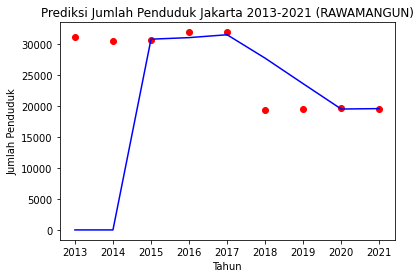

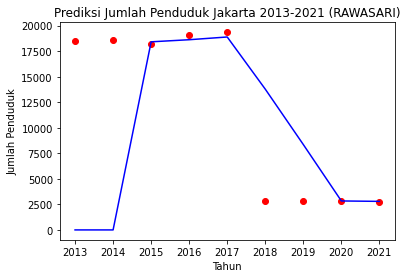

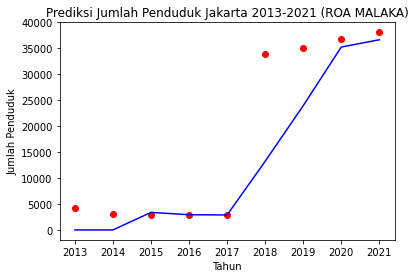

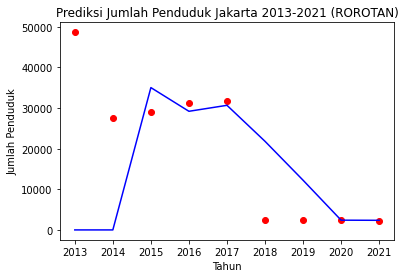

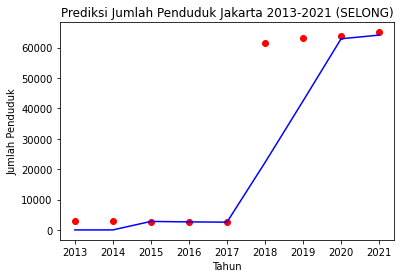

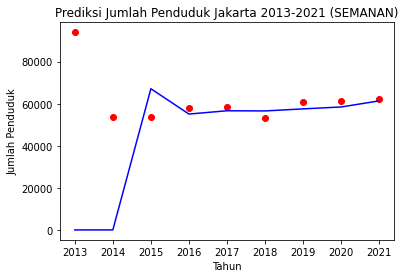

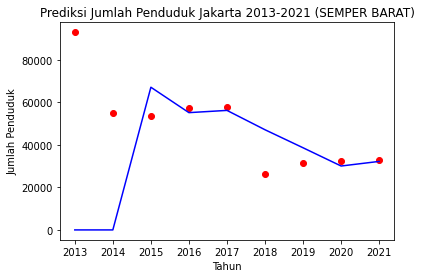

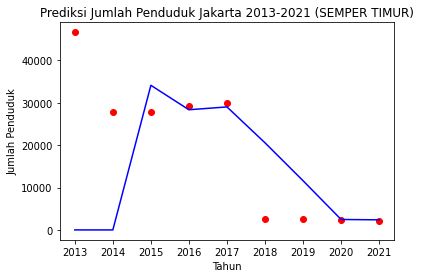

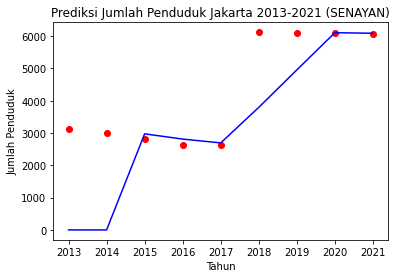

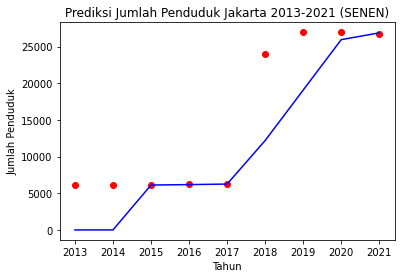

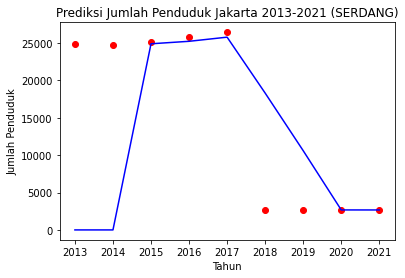

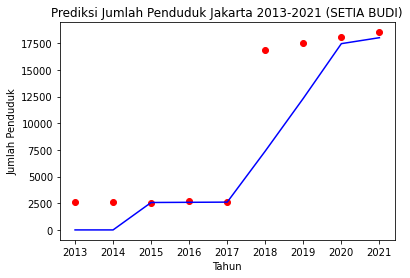

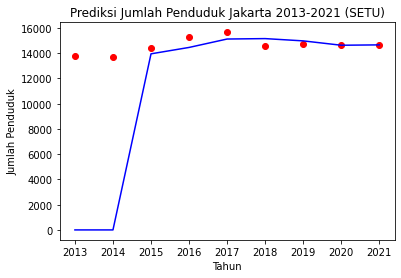

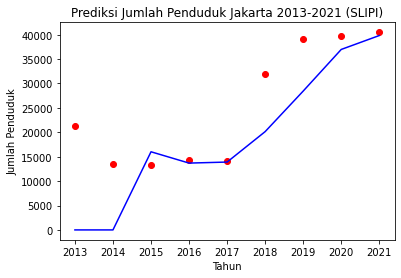

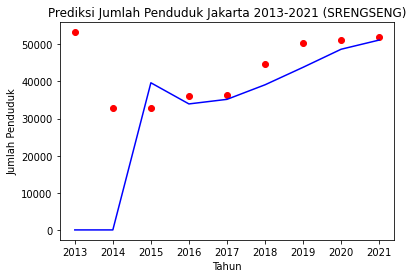

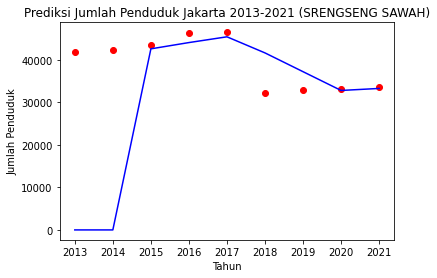

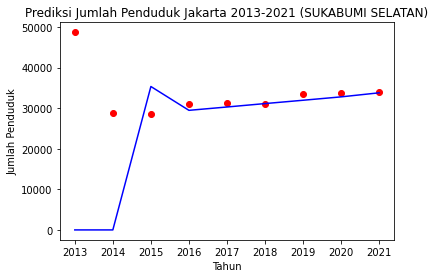

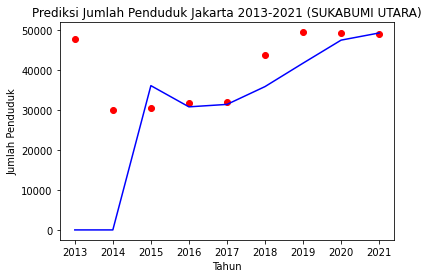

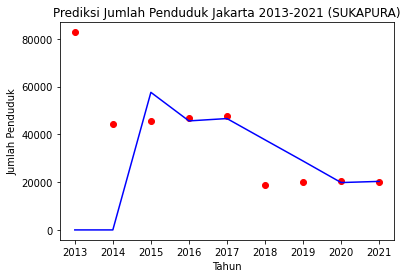

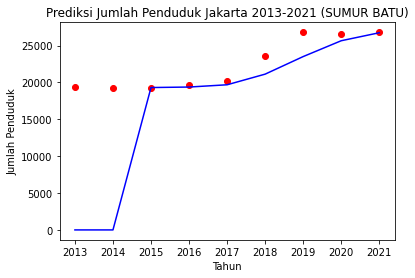

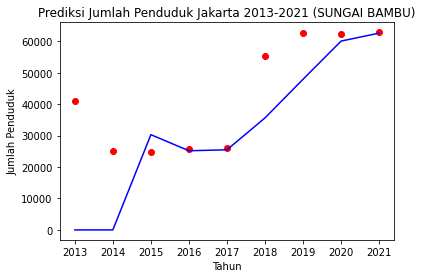

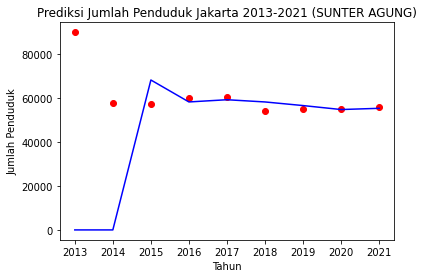

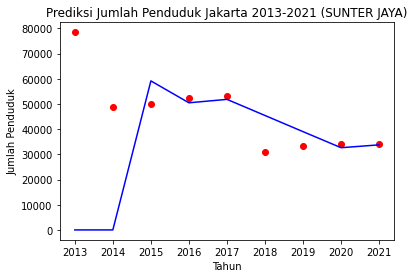

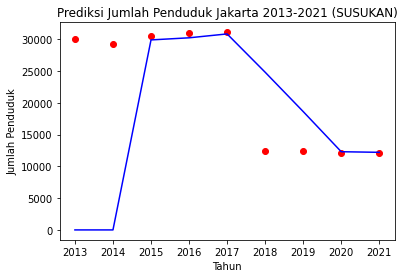

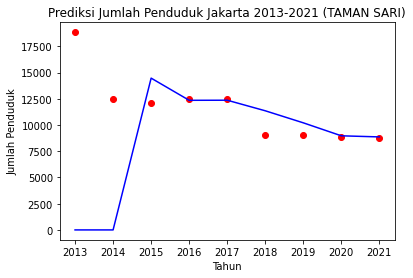

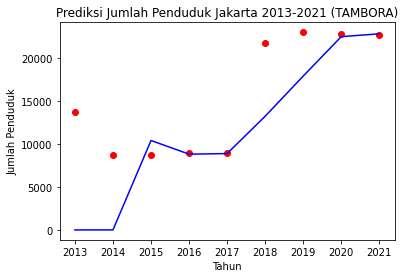

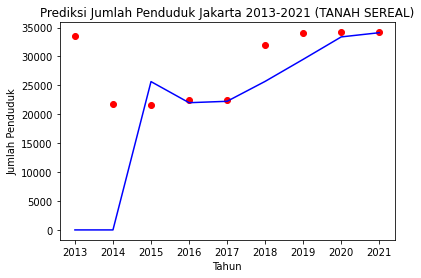

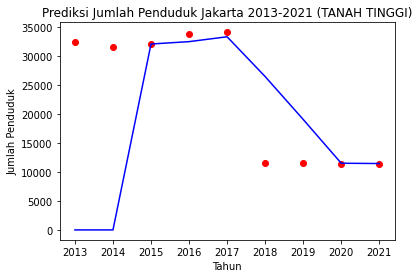

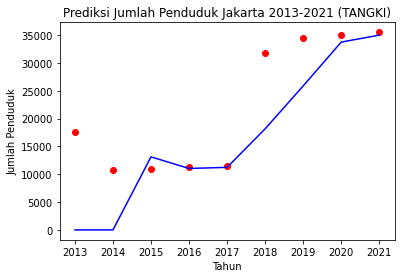

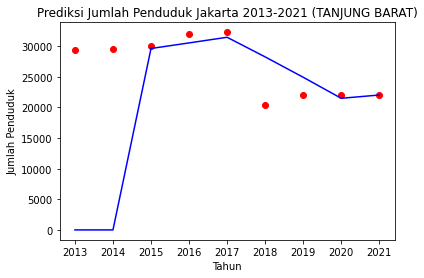

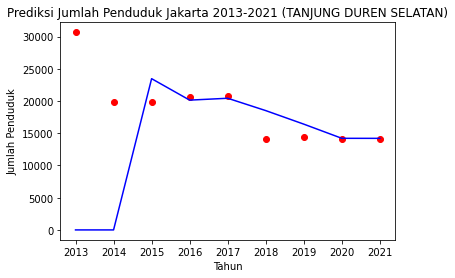

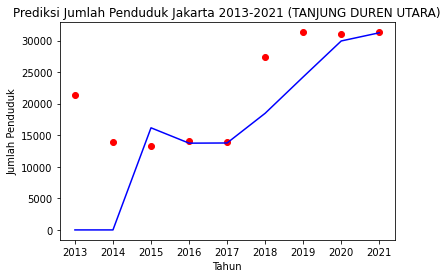

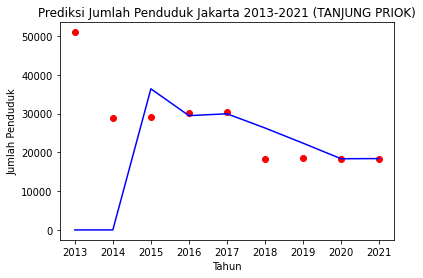

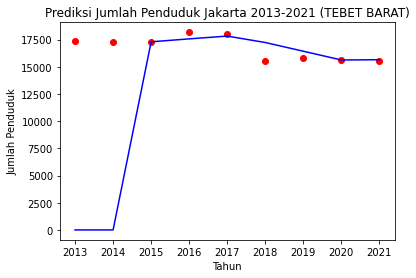

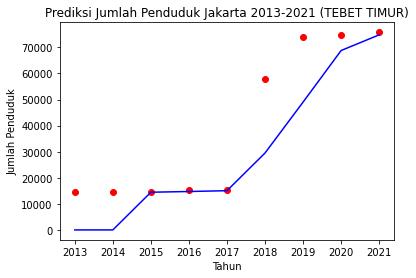

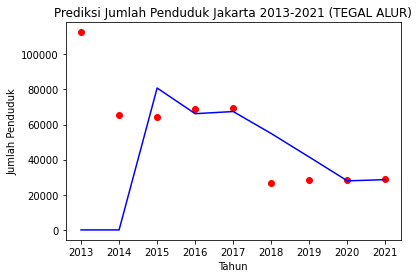

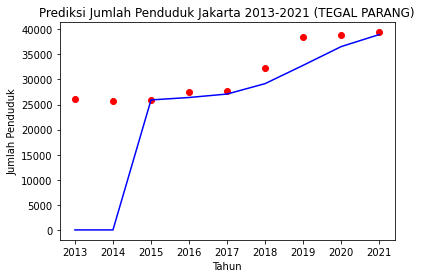

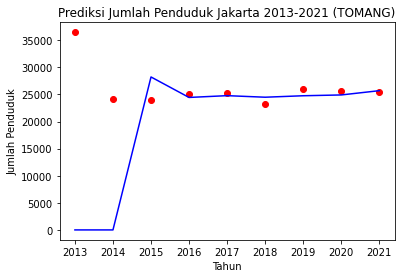

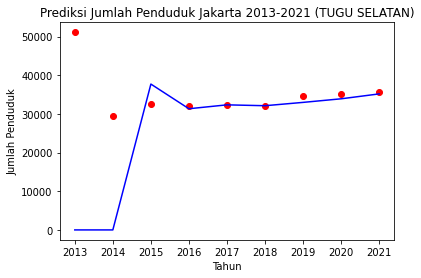

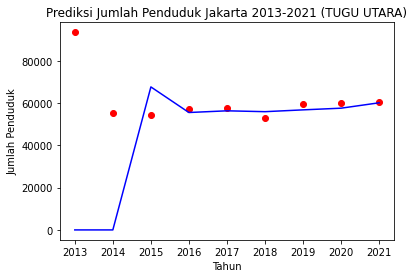

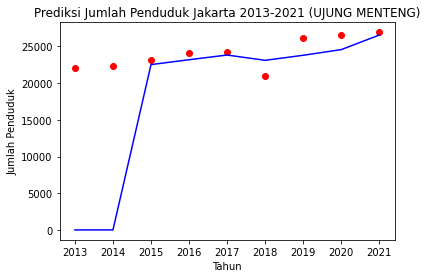

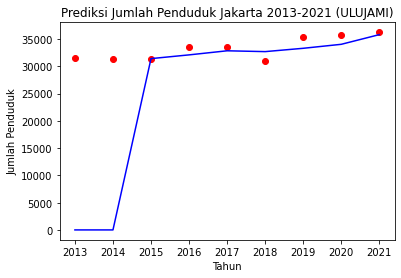

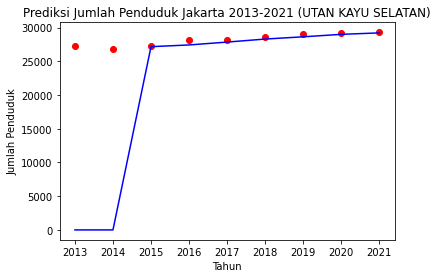

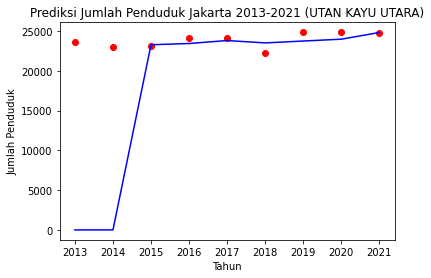

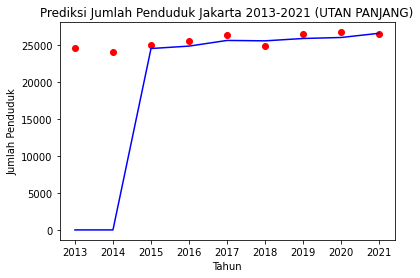

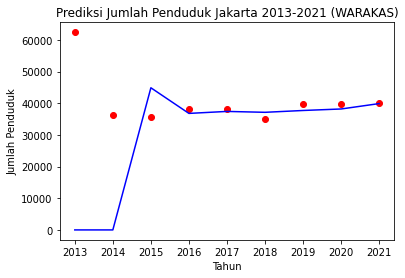

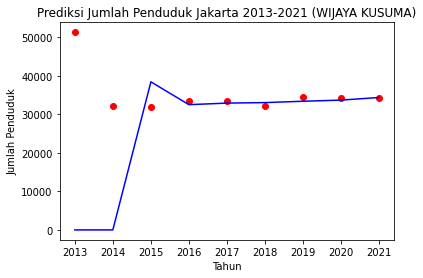

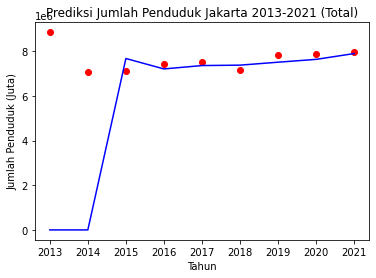

In [9]:
for item in col:
  plt.scatter(df_transposed["tahun"], df_transposed[item], color="red")
  plt.plot(df_transposed["tahun"], df_transposed[f'Prediksi {item}'], color="blue")
  plt.title(f'Prediksi Jumlah Penduduk Jakarta 2013-2021 ({item})')
  plt.xlabel("Tahun")
  if item == "Total":
    plt.ylabel("Jumlah Penduduk (Juta)")
  else:
    plt.ylabel("Jumlah Penduduk")
  plt.show()